In [0]:
import pandas as pd #import pandas 
import numpy as np  #import numpy
import matplotlib.pyplot as plt #import matplotlib
from scipy.stats import chi2_contingency #import chi2_contigency for chi2 independency tet
from matplotlib import style
style.use('ggplot')

In [0]:
df = pd.read_csv('/content/drive/My Drive/data_set/E-commerce.csv')  #read the data

In [0]:
df.shape  #check shape of the data

(23472, 9)

In [0]:
df.head()  #check head of the data

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,5,1,4,General,Dresses,Dresses
2,2,1077,60,3,0,0,General,Dresses,Dresses
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,4,847,47,5,1,6,General,Tops,Blouses


In [0]:
df.drop('Unnamed: 0',axis=1,inplace=True)  #drop Unnamed: 0 column

In [0]:
df.columns   #check columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [0]:
df.isnull().sum()

Clothing ID                0
Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

Here we will work only with 2 columns Recommended IND and Ratings. 

We want to check whether the website recommendations are independent of ratings or not.

In [0]:
df_1 = df[['Rating','Recommended IND']]  #store rating and Recommended IND in df_1

In [0]:
df_1.head()  #check head

,Rating,Recommended IND
0,4,1
1,5,1
2,3,0
3,5,1
4,5,1


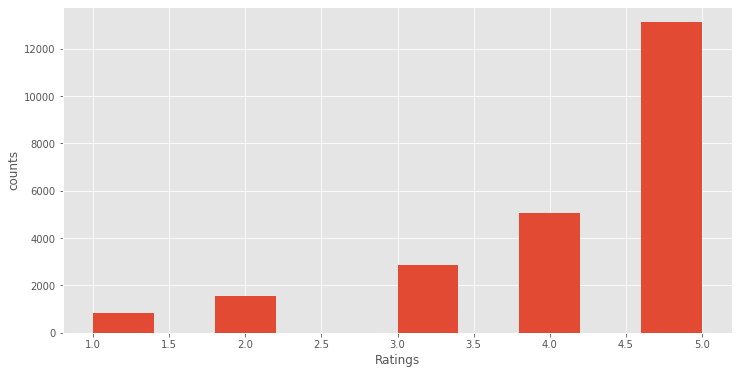

In [0]:
#Let's plot and check the frequency of ratings

plt.figure(figsize=(12,6))  #set figure size
plt.hist(df_1['Rating'])    #plot a histogram
plt.xlabel('Ratings')       #set xlabel
plt.ylabel('counts')        #set ylabel
plt.show()

We can see from the the distribution that most of the product are highly rated.Most are rated grater than 3.

In [0]:
#crosstab to check the rating of the product and whether website recommends or not.
cross_tab = pd.crosstab(df_1['Rating'],df_1['Recommended IND']).T
cross_tab

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


As we can see mostly high rated products are recommended by the website. We want statstical method to check whether the website's recommendation are dependent on ratings or not.

In [0]:
#H0 : Recommended IND is independent of Ratings
#H1 : Recommended IND is not independent of Ratings
#Alpha : 0.05

In [0]:
alpha = 0.05

stats,p_value,degrees_of_freedom,expected = chi2_contingency(cross_tab)
if p_value > alpha:
  print(f' Accept Null Hypothesis\n P-Value is {p_value}\n Recommendations are Independent of Ratings')
else:
  print(f' Reject Null Hypothesis\n P-Value is {p_value}\n Recommendations are not Independent of Ratings') 

 Reject Null Hypothesis
 P-Value is 0.0
 Recommendations are not Independent of Ratings


Chi2 independency test tells us that the Recommendations are not independent of ratings. We can also check it using 

In [0]:
recommended = df_1[df_1['Recommended IND']==1]  #store all the recommended products in a recommended
not_recommended = df_1[df_1['Recommended IND']==0]  #store all the not recommended products in a not recommended

In [0]:
recommended['Rating'].value_counts()  #check the value counts in recommended 

5    13092
4     4909
3     1189
2       94
1       16
Name: Rating, dtype: int64

In [0]:
not_recommended['Rating'].value_counts()  #check the values count in not recommended

3    1682
2    1471
1     826
4     168
5      25
Name: Rating, dtype: int64

Most of the recommended products has higher ratings. And Those which were not recommended have lower rating. Indeed the website recommendation is dependent on ratings.

We can check it visually using histogram as well.

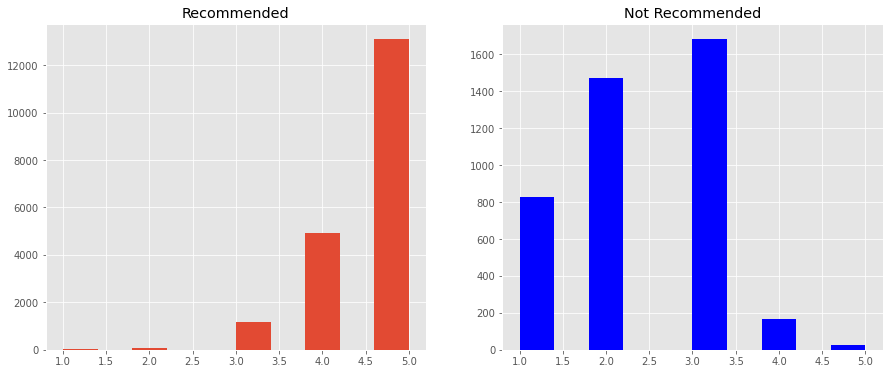

In [0]:
#plot different histograms for recommended and not recommended ratings
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
recommended['Rating'].hist(ax=ax1)
ax1.set_title('Recommended')
not_recommended['Rating'].hist(ax=ax2,color='blue')
ax2.set_title('Not Recommended')
plt.show()

It is obvious from the plot that the Recommendation are dependent on Ratings. As we can see in graph the red bars shows that the recommended products has ratings greater than three. And the bars shows that the not recommended products were those which has lower ratings.